In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power

pi= np.pi
lam0 = 1/2000000  #500nm

In [82]:
def rp(n1, n2):                       #equations simplify to these at normal incidence
    return (n2 - n1) / (n2 + n1)
    
def rs(n1, n2):       
    return (n1 - n2) /  (n1 + n2)

def t(n1, n2):  #t_p = t_s at normal incidence
    return (2*n1)/ (n1+n2)

In [83]:
def I(n_a, n_b):         
    x= (1/t(n_a, n_b))
    y = np.array(([1, rp(n_a, n_b)], [rp(n_a, n_b), 1]))
    
    return np.multiply(x,y)   #this is working and returning the correct array

In [84]:
def gam(lam):
    return 2*pi*lam0/4*(1/lam)

gam(lam0) #gives pi/2 as required

1.5707963267948966

In [85]:
def r(n0,n_h,n_l,n_s,p,lam):     #should give the matrix from which we can find r and t
    
    L = np.array(([np.cos(-gam(lam))-np.sin(gam(lam))*1j, 0],
                  [0, np.cos(gam(lam))+np.sin(gam(lam))*1j]))
    I_start = I(n0, n_h)             #going from air to the first layer
    I_HL = np.matmul(L, I(n_h,n_l))  #high to low
    I_LH = np.matmul(L, I(n_l,n_h))  #low to high
    I_finish = np.matmul(L, I(n_h, n_s))   #going from the last layer to the substrate
    
    Q= np.matmul(I_HL, I_LH) 
    S = np.matmul(I_start,np.matmul(matrix_power(Q,p),I_finish))
    return (S[1][0]/ S[0][0]).real 

In [86]:
L = np.array(([np.cos(gam(lam0))-np.sin(gam(lam0))*1j,0],
                  [0,np.cos(gam(lam0))+np.sin(gam(lam0))*1j]))
L       #giving not quite 0 for some reason as np.cos(pi/2) is evaluating as this....         

array([[6.123234e-17-1.j, 0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17+1.j]])

In [87]:
I_start = I(1, 3) 
I_start   #this is the same/correct

array([[2., 1.],
       [1., 2.]])

In [88]:
I_HL = np.matmul(L, I(3,2)) 
I_HL  

array([[ 5.102695e-17-0.83333333j, -1.020539e-17+0.16666667j],
       [-1.020539e-17-0.16666667j,  5.102695e-17+0.83333333j]])

In [89]:
I_LH = np.matmul(L, I(2,3)) 
I_LH 

array([[7.65404249e-17-1.25j, 1.53080850e-17-0.25j],
       [1.53080850e-17+0.25j, 7.65404249e-17+1.25j]])

In [90]:
I_finish = np.matmul(L, I(3, 1.5))
I_finish 

array([[ 4.5924255e-17-0.75j, -1.5308085e-17+0.25j],
       [-1.5308085e-17-0.25j,  4.5924255e-17+0.75j]])

In [91]:
r(1,3,2,1.5,0,lam0)  #ok this is wrong/different to the working model, should be 0.714

0.7142857142857142

In [92]:
def R(n0,n_h,n_l,n_s, p,lam):
    return (np.abs(r(n0,n_h,n_l,n_s, p,lam)))**2

R(1,3,2,1.5,0,lam0)  

0.510204081632653

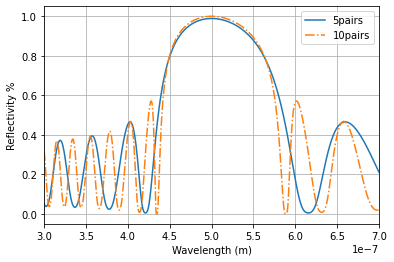

In [93]:
n = np.linspace(0.0000003,0.0000007,1000) #varying wavelength between 300nm and 700nm


plt.plot(n, R(1,3,2,1.5,5,n))  #for 5 pairs
plt.plot(n, R(1,3,2,1.5,10,n),'-.') 
#plt.plot(n, R(1,3.49,2.95,1.5,20,n), ':')
#plt.plot(n, R(1,3.49,2.95,1.5,40,n), ':', linewidth=4)
#plt.plot(n, R(1,3.49,2.95,1.5,100,n))

plt.xlim(0.0000003,0.0000007)
#plt.ylim(0.9,1)
#plt.title('')

plt.ylabel('Reflectivity %')
plt.xlabel('Wavelength (m)')

plt.grid()
plt.legend(['5pairs','10pairs','20pairs','40pairs'])

plt.show()

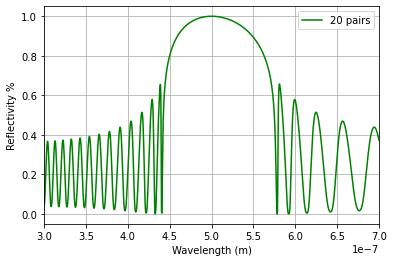

In [95]:
n = np.linspace(0.00000030,0.0000007,1000) #varying wavelength between 300nm and 700nm

#plt.plot(n, R(1,3,2,1.5,2,n), linewidth=1.5, label='2 pairs')
#plt.plot(n, R(1,3,2,1.5,6,n),'r', linewidth=1.5, label='6 pairs')  #for 5 pairs
#plt.plot(n, R(1,3,2,1.5,10,n),':', linewidth=3, label='10 pairs') 
plt.plot(n, R(1,3,2,1.5,20,n), 'g',linewidth =1.5, label='20 pairs')
#plt.plot(n, R(1,3,2,1.5,40,n), ':', linewidth=4, label='40 pairs')
#plt.plot(n, R(1,3,2,1.5,100,n))

plt.xlim(0.0000003,0.00000070)
#plt.ylim(0.99,1)
#plt.title('')

plt.ylabel('Reflectivity %')
plt.xlabel('Wavelength (m)')

plt.grid()
plt.legend()

plt.savefig('wavelength1510')
plt.show()

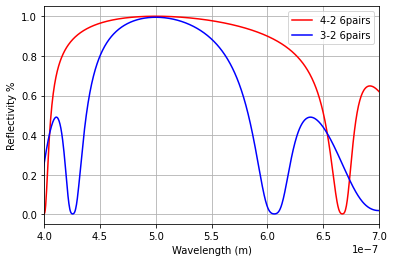

In [80]:
n = np.linspace(0.00000030,0.0000007,1000) #varying wavelength between 300nm and 700nm

plt.plot(n, R(1,4,2,1.5,6,n),'r', linewidth=1.5, label='4-2 6pairs') 
plt.plot(n, R(1,3,2,1.5,6,n),'b', linewidth=1.5, label='3-2 6pairs')  

#plt.plot(n, R(1,4,2,1.5,20,n),'r:', linewidth=3, label='4-2 20pairs') 
#plt.plot(n, R(1,3,2,1.5,20,n),'b:', linewidth=3, label='3-2 20pairs')  

plt.xlim(0.0000004,0.00000070)
#plt.ylim(0.99,1)
#plt.title('')

plt.ylabel('Reflectivity %')
plt.xlabel('Wavelength (m)')

plt.grid()
plt.legend()

plt.savefig('differnent_indexdiff')
plt.show()